In [1]:
# Import Dependencies
from sqlalchemy import create_engine  
import pandas as pd
import json

# Pull from config file with personal SQL postgres information
with open('config.json') as json_data_file:
    data = json.load(json_data_file)

In [2]:
# Conceal personal pastgres information
username = data["user"]
password = data["passw"]
host = data["host"]
database = data["database"]

In [3]:
# Create Engine
engine = create_engine(f"postgresql://{username}:{password}@{host}/{database}")
conn = engine.connect()

In [4]:
# Query All Records in the the employees table
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.head()

,emp_no,brith_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [5]:
# Query All Records in the the titles table
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
# Merge titlie table with employees table
emp_titles = pd.merge(employees, titles, on='emp_no', how='inner')
emp_titles.head()

,emp_no,brith_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [7]:
# Query All Records in the the salaries table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [8]:
# Merge titlie table with emp_titles table
emp_titles_salary_df = pd.merge(emp_titles, salaries, on='emp_no', how='inner')
emp_titles_salary_df.head()

,emp_no,brith_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [9]:
# Keep only neccessary columns
employees_new = emp_titles_salary_df.reindex(columns=["title", "salary"])
employees_new.head()

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054


In [10]:
# Group by title
title_group = employees_new.groupby("title")

#Average salage by title group
avg_salary = round(title_group["salary"].mean(),2)
avg_salary

title
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: salary, dtype: float64

Text(0, 0.5, 'Salary')

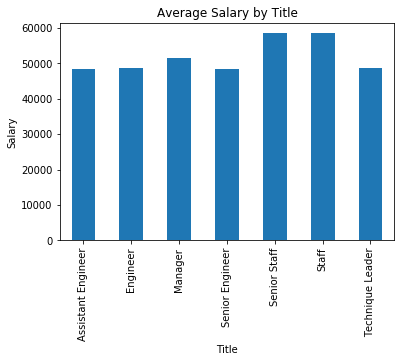

In [12]:
# Create bar chart of average salary by title
salary_chart = avg_salary.plot(kind="bar", x="title", y="salary", title="Average Salary by Title")
salary_chart.set_xlabel("Title")
salary_chart.set_ylabel("Salary")